<a href="https://colab.research.google.com/github/Ry02024/GoogleSearchSuggestChecker/blob/main/GoogleSearchSugestChecker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# スクリプト

In [1]:
import requests
import json

def get_neutral_google_suggests(query, language='ja', region='ja'):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    url = f"https://suggestqueries.google.com/complete/search?client=firefox&hl={language}&gl={region}&q={query}"
    response = requests.get(url, headers=headers)
    suggestions = json.loads(response.text)[1]
    return suggestions

query = "医師　結婚"
suggests = get_neutral_google_suggests(query, language='ja', region='ja')
for i, suggest in enumerate(suggests):
    print(f"{i + 1}. {suggest}")

1. 医師 結婚
2. 医師 結婚相談所
3. 医師 結婚指輪
4. 医師 結婚率
5. 医師 結婚相手 職業
6. 医師 結婚 貧乏
7. 医師 結婚式
8. 医師 結婚 手続き
9. 医師 結婚 年齢
10. 医師 結婚 後悔


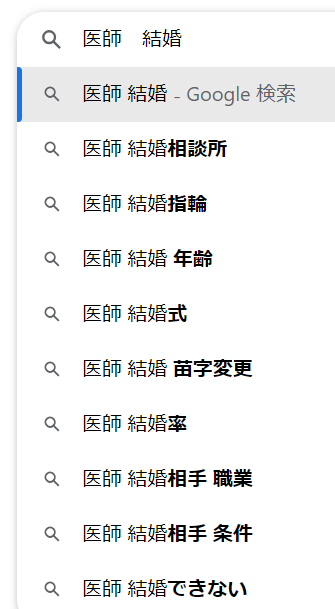

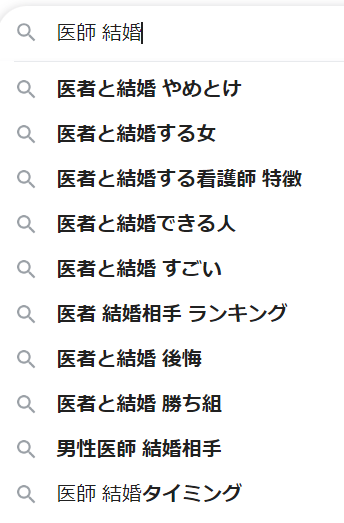

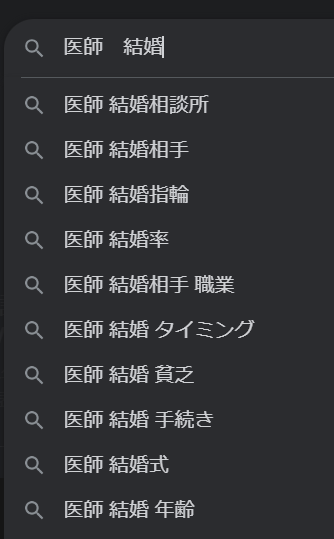

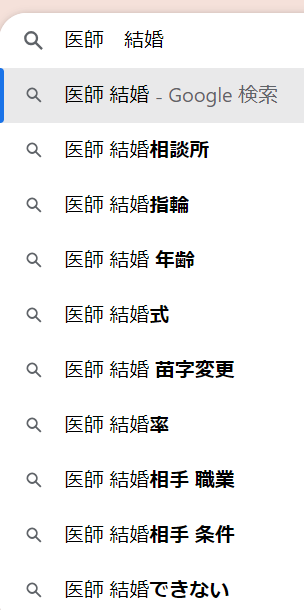

# アプリ

##環境構築

In [12]:
!pip install streamlit streamlit-webrtc pyzbar pillow requests opencv-python-headless pyngrok -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 773.8/773.8 kB 25.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 15.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 38.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.3/34.3 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 36.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 26.5 MB/s eta 0:00:00


In [13]:
!sudo apt-get install libzbar0

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-double3
  libgs9 libgs9-common libidn12 libijs-0.35 libjbig2dec0 libjxr-tools libjxr0
  liblqr-1-0 libmagickcore-6.q16-6 libmagickcore-6.q16-6-extra
  libmagickwand-6.q16-6 libv4l-0 libv4lconvert0 libwmflite-0.2-7 poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre
  ghostscript-x libfftw3-bin libfftw3-dev inkscape poppler-utils
  fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nanum
The following NEW packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts
  imagemagick-6-common libdjvulibre-text libdjvulibre21 libfftw3-

In [14]:
import streamlit as st
from pyngrok import ngrok

In [15]:
from google.colab import userdata
NGROK_AUTH_TOKEN = userdata.get('NGROK_AUTH_TOKEN')

In [16]:
from pyngrok import ngrok
import os

# ngrokトークンを設定
ngrok.set_auth_token(NGROK_AUTH_TOKEN)

## 実行ファイル

In [10]:
%%writefile google_suggest.py
import requests
import json

def get_neutral_google_suggests(query, language='ja', region='jp'):
    headers = {
        "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
    }
    url = f"https://suggestqueries.google.com/complete/search?client=firefox&hl={language}&gl={region}&q={query}"
    response = requests.get(url, headers=headers)

    if response.status_code != 200:
        return []

    suggestions = json.loads(response.text)[1]
    return suggestions

Writing google_suggest.py


In [11]:
%%writefile streamlit_app.py
import streamlit as st
from google_suggest import get_neutral_google_suggests

# Streamlitアプリケーションの設定
st.title('Google Suggest サジェスト取得アプリ')
query = st.text_input('検索クエリを入力してください:', '医師 結婚')

if st.button('サジェスト取得'):
    suggests = get_neutral_google_suggests(query, language='ja', region='jp')
    if suggests:
        st.write('サジェスト結果:')
        for i, suggest in enumerate(suggests):
            st.write(f"{i + 1}. {suggest}")
    else:
        st.write('サジェスト結果がありません。')


Writing streamlit_app.py


##アプリの起動

In [17]:
# ngrokを介してStreamlitを公開
public_url = ngrok.connect(addr='8501')
print('Public URL:', public_url)

Public URL: NgrokTunnel: "https://3992-34-73-24-185.ngrok-free.app" -> "http://localhost:8501"


In [18]:
# Streamlitアプリケーションの起動
!streamlit run streamlit_app.py >/dev/null